Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('../data/raw/data.csv') # load the data to a pandas dataframe
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


Overview of the Data

In [18]:
print ("Structure of dataset", df.shape)
df.describe()


Structure of dataset (95662, 16)


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

Summary Statistics

In [4]:
numeric_cols = df.select_dtypes(include=np.number).columns # defining numeric columns
print ("Mean of Numeric Columns:")
df[numeric_cols].mean() # calculating means of numeric columns

Mean of Numeric Columns:


CountryCode         256.000000
Amount             6717.846433
Value              9900.583941
PricingStrategy       2.255974
FraudResult           0.002018
dtype: float64

In [5]:
print ("Mode of Numeric Columns:")
df[numeric_cols].mode().iloc[0] # calculating modes of numeric columns

Mode of Numeric Columns:


CountryCode         256.0
Amount             1000.0
Value              1000.0
PricingStrategy       2.0
FraudResult           0.0
Name: 0, dtype: float64

In [6]:
print ("Median of Numeric Columns:")
df[numeric_cols].median() # calculating medians of numeric columns

Median of Numeric Columns:


CountryCode         256.0
Amount             1000.0
Value              1000.0
PricingStrategy       2.0
FraudResult           0.0
dtype: float64

Distribution of Numerical Features

In [7]:
df[numeric_cols].skew() # skewness of numeric columns

CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64

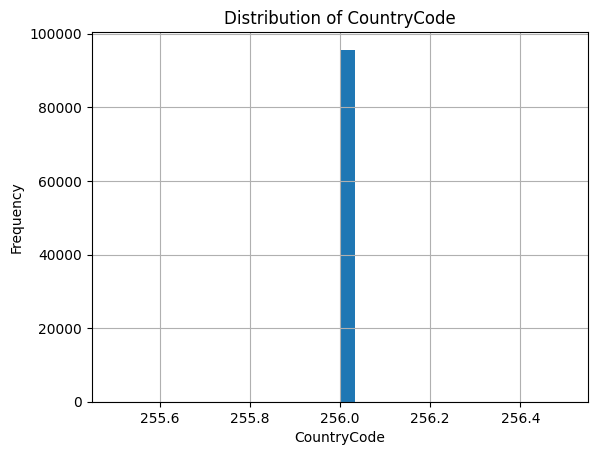

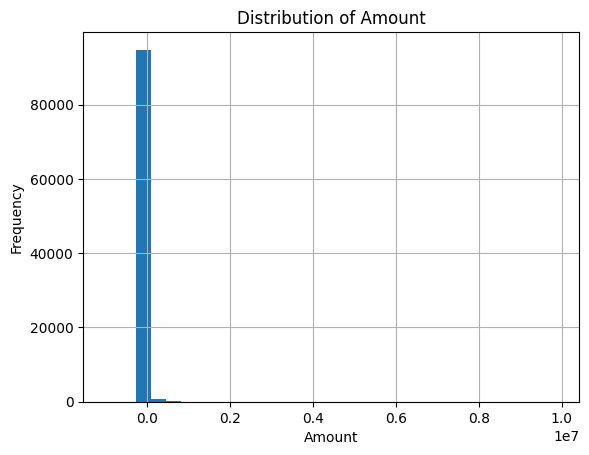

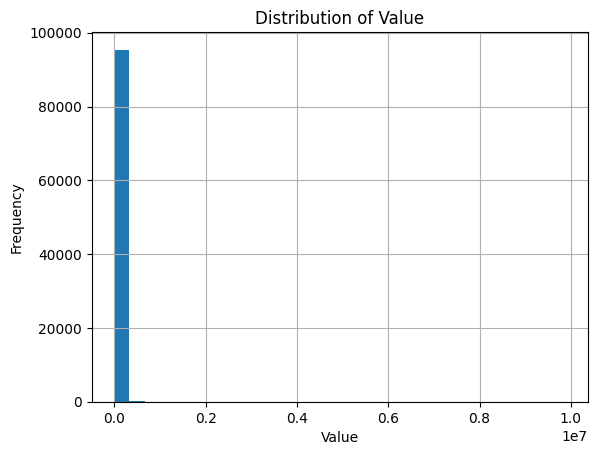

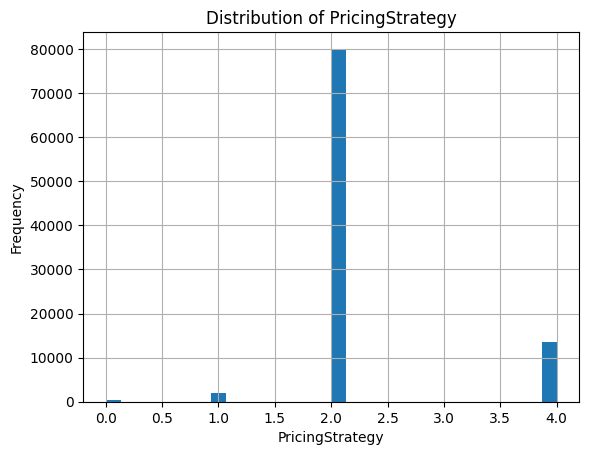

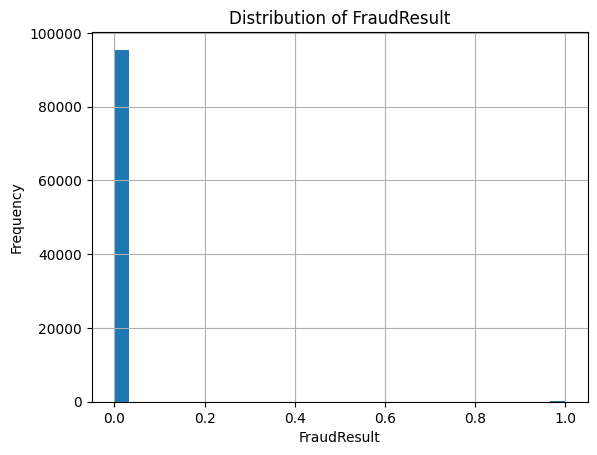

In [8]:
for col in numeric_cols:
   plt.figure()
   df[col].hist(bins=30) # distribution of all numeric columns using histogram
   plt.title(f'Distribution of {col}')
   plt.xlabel(col)
   plt.ylabel('Frequency')
   plt.show()

Distribution of Categorical Features

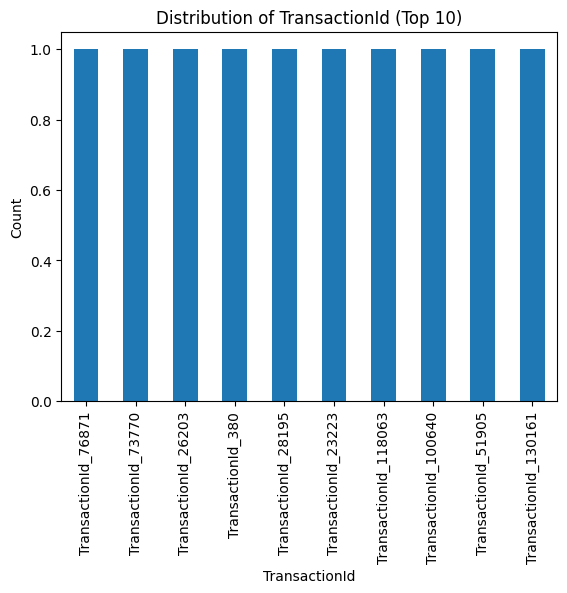

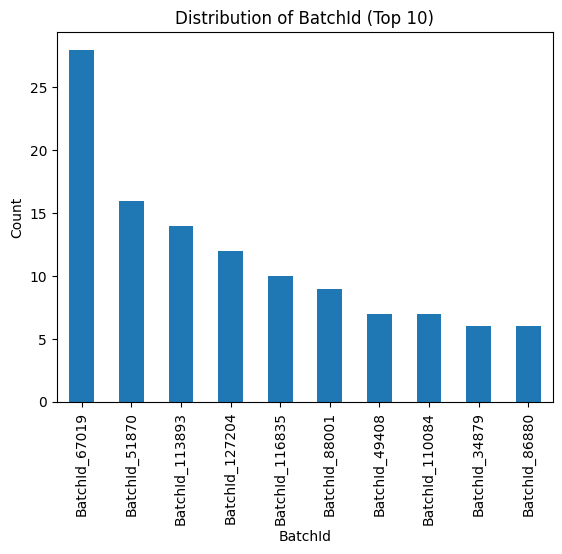

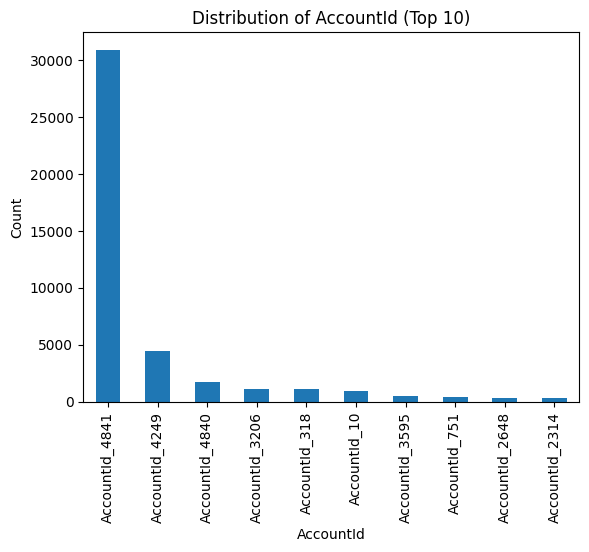

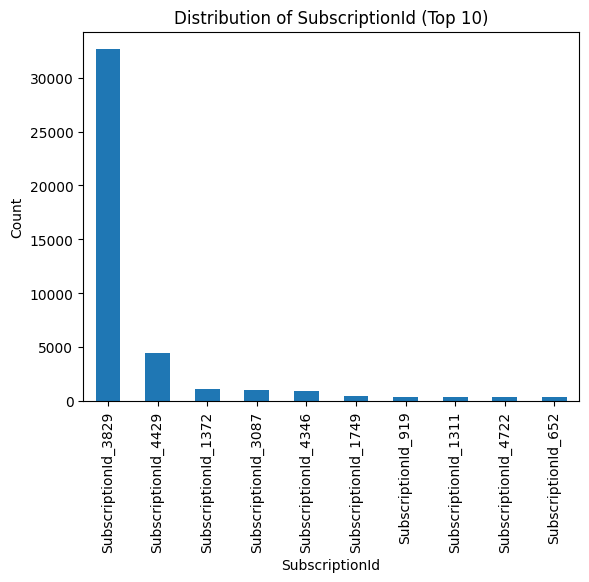

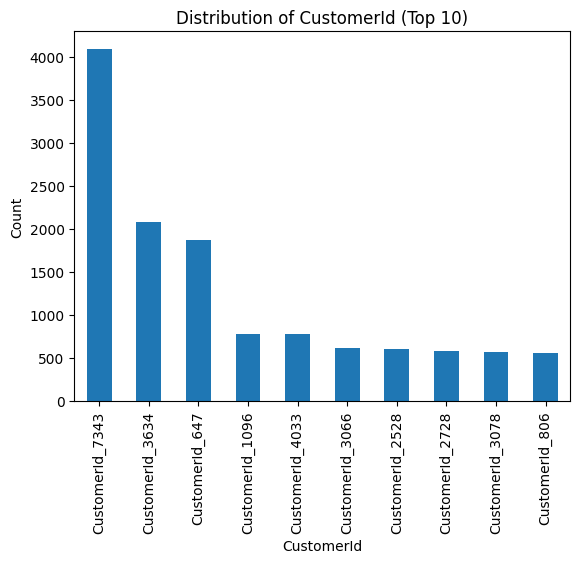

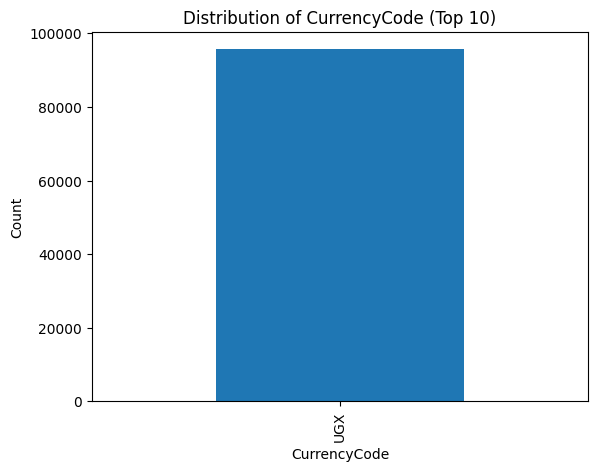

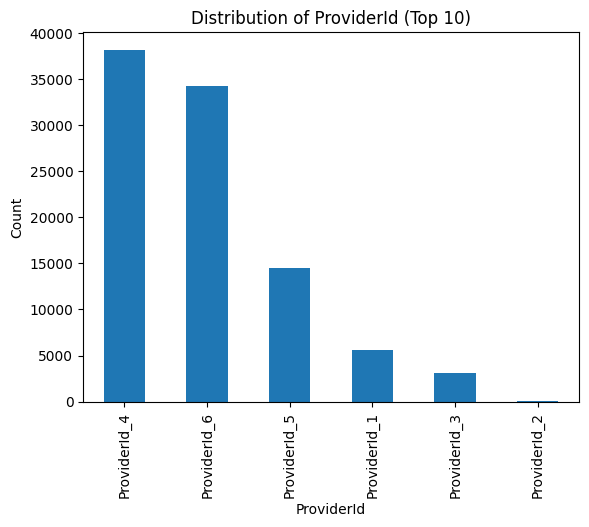

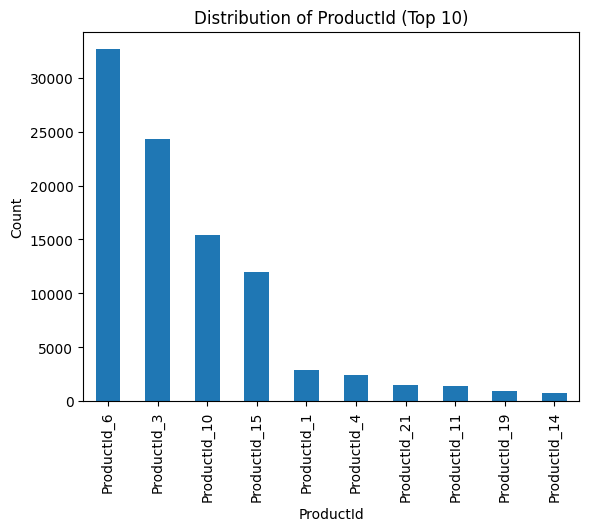

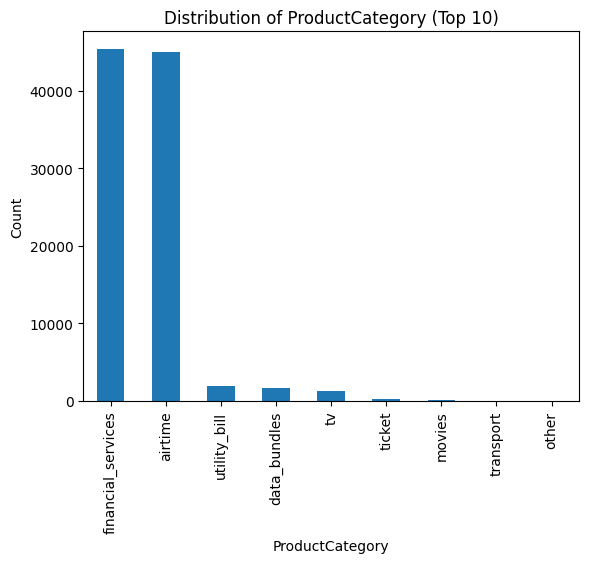

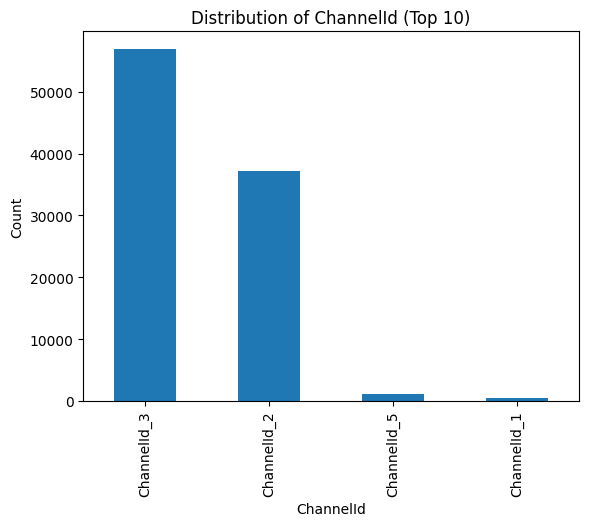

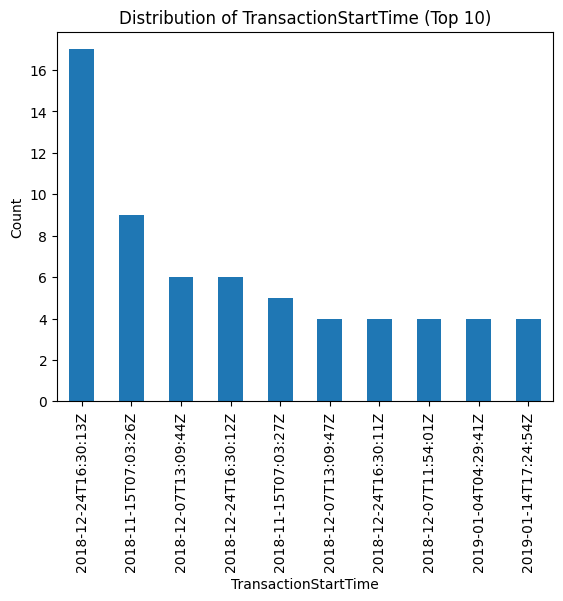

In [10]:
categorical_cols = df.select_dtypes(include='object').columns # defining categorical columns

for col in categorical_cols:
    plt.figure()
    df[col].value_counts().head(10).plot(kind='bar') # distribution considering top 10 of categorical columns
    plt.title(f'Distribution of {col} (Top 10)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
 

Correlation Analysis

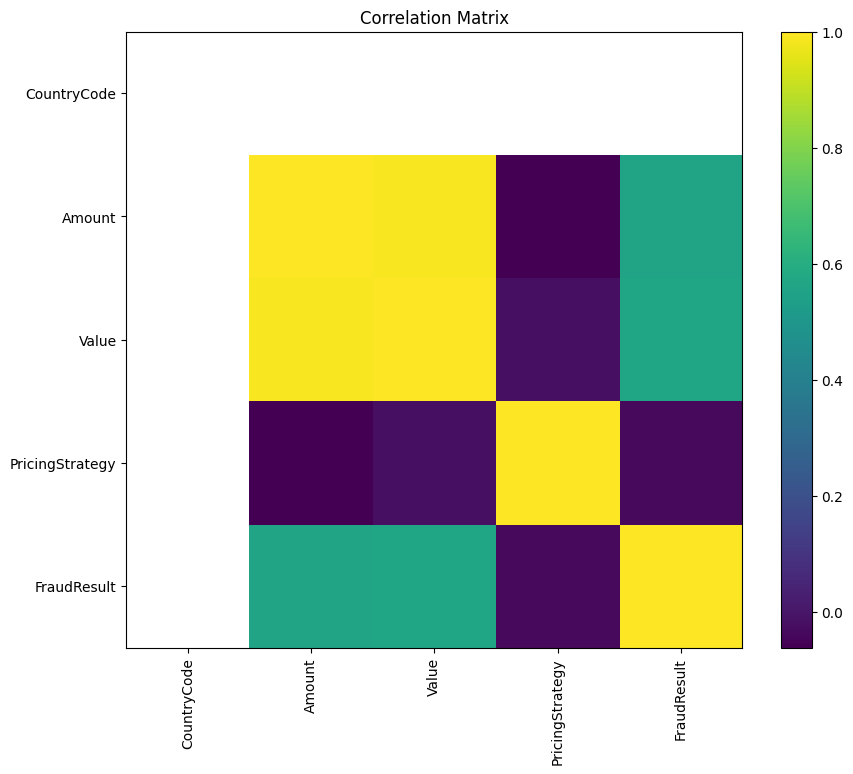

In [11]:
corr = df[numeric_cols].corr() # correlation between numeric columns
plt.figure(figsize=(10, 8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Matrix')
plt.show()

Identifying Missing Values

In [14]:
df.isnull().sum().sort_values(ascending=False)

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

There are no null values in all columns

Outlier Detection

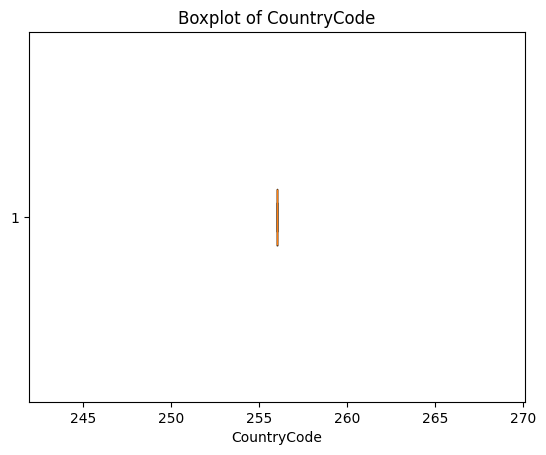

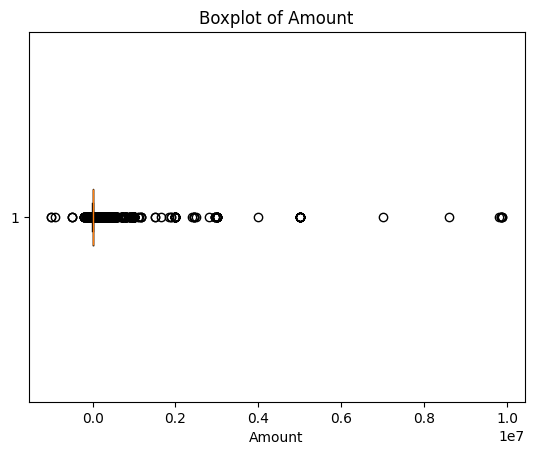

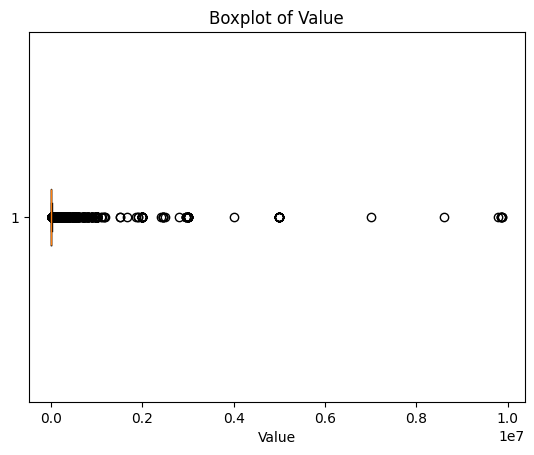

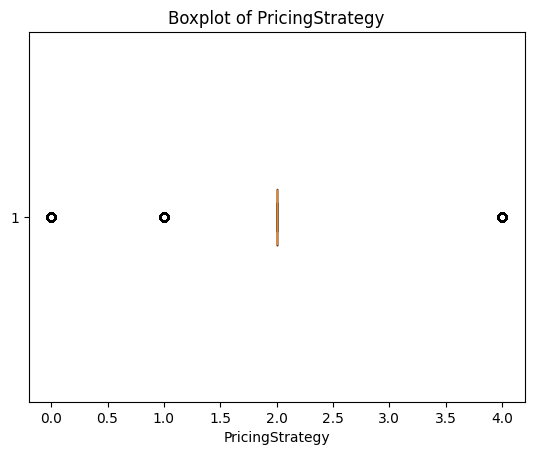

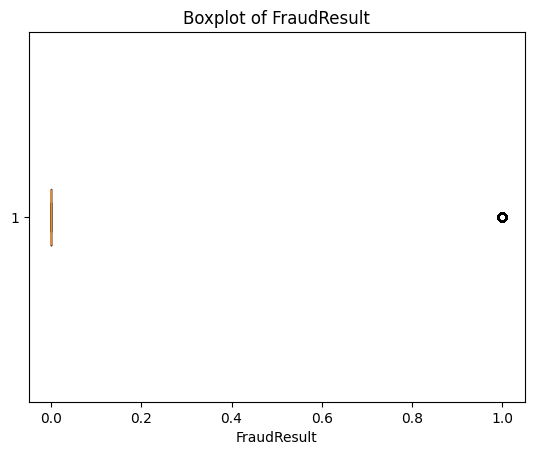

In [15]:
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

## Important insights


1. All numeric columns (except for country_code given that there is only one country code) are right-skewed which indicates non-normal distributions and the potential of log transformations. Specially Amount and Value show a very high right skewness indicating that large transaction amounts ull the mean far from the typical transaction size. The boxplots also confirms that there are multiple outliers.

2. A relatively high correlation was observed between Fraud Result and Amount and Fraud Result and Value. The central tendency measures also suggest that there is a high fraud imbalance. The boxplot further depicts the fraudulent result (i.e. 1) as an outlier showing that most transactions are non-fraudulent. 

3. The absence of no nun-values shows data completeness. 